In [55]:
import pandas as pd
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [56]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_result = df_test[['PassengerId']].copy()
df_result['Survived'] = pd.Series(np.random.randn(len(df_result)), index=df_result.index)

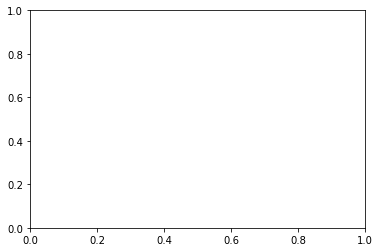

In [57]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.show()

In [58]:
df_train = df_train.fillna(0)
df_test = df_test.fillna(0)
fare_mean = df_train['Fare'].mean()
fare_median = df_train['Fare'].median()

for i in range(0,len(df_train['Fare'])):
    val = df_train.iloc[i]['Fare']
    if(val<=fare_median):
        df_train.at[i,'Fare']  = 1
    elif(val>fare_median and val<=fare_mean):
        df_train.at[i,'Fare'] = 2
    else:
        df_train.at[i,'Fare'] = 3

for i in range(0, len(df_test['Fare'])):
    val = df_test.iloc[i]['Fare']
    if(val<=fare_median):
        df_test.at[i,'Fare'] = 1
    elif(val>fare_median and val<=fare_mean):
        df_test.at[i,'Fare'] = 2
    else:
        df_test.at[i,'Fare'] = 3

#df_train['Sex'] = df_train['Sex'].map({'male':1,'female':2})
df_train['Sex'].replace(['female','male'],["1","2"],inplace=True)
df_test['Sex'].replace(['female','male'],["1","2"],inplace=True)
df_train['Embarked'].replace(['Q','S','C'],["1","2","3"],inplace=True)
df_test['Embarked'].replace(['Q','S','C'],["1","2","3"],inplace=True)
#df_train.loc[df_train.Sex == 'female', 'female'] = 2
#df_test['Sex'] = df_test['Sex'].map({'male':1,'female':2})

#df_train['Embarked'] = df_train['Embarked'].map({'Q':1,'S':2, 'C':3})
#df_test['Embarked'] = df_test['Embarked'].map({'Q':1,'S':2, 'C':3})
X = df_train[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
y = df_train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

#X_train = df_train[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
#Y_train = df_train['Survived']

X_toTest = df_test[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]

In [59]:
X_train.head(6)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
6,1,2,54.0,0,0,3.0,2
718,3,2,0.0,0,0,2.0,1
685,2,2,25.0,1,2,3.0,3
73,3,2,26.0,1,0,1.0,3
882,3,1,22.0,0,0,1.0,2
328,3,1,31.0,1,1,2.0,2


In [60]:
lin_clf = svm.SVC()
lin_clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [61]:
y_pred = lin_clf.predict(X_toTest)

In [63]:
df_result['Survived'] = y_pred
df_result.to_csv('submission.csv')